<a href="https://colab.research.google.com/github/Annah998936/AMATH581-Scientific-Computing/blob/main/CSE_547_Spring_2024_Colab_8'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE547 - Colab 8
## Interpreting sentiment classifiers

Adapted from SHAP documentation

### Setup

In [1]:
!pip install shap
!pip install transformers
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [2]:
import datasets
import numpy as np
import scipy as sp
import torch
import transformers
import shap

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### Your task



You will load a pretrained BERT embedding model from Hugging Face and use [SHAP](https://shap.readthedocs.io/en/latest/index.html) to interpret how words contribute to model predictions for sentiment classification.

We will ask you to read some documentation from SHAP and fill in the sections marked with `TODO` in some notebook cells.

In [3]:
# Load a BERT sentiment analysis model
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained(
    "distilbert-base-uncased"
)
classifier = transformers.DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased-finetuned-sst-2-english"
).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [4]:
# Define a prediction function that classifies a given piece of text
def f(x):
    tv = torch.tensor(
        [
            tokenizer.encode(v, padding="max_length", max_length=500, truncation=True)
            for v in x
        ]
    ).to(device)
    outputs = classifier(tv)[0].detach().cpu().numpy()
    scores = (np.exp(outputs).T / np.exp(outputs).sum(-1)).T
    val = sp.special.logit(scores[:, 1])  # use one vs rest logit units
    return val

In [5]:
# Load the dataset
imdb_train = datasets.load_dataset("imdb")["train"]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Intialize an Explainer object and use it to generate SHAP values.

You may find [this documentation](https://shap.readthedocs.io/en/latest/generated/shap.Explainer.html) useful.

In [7]:
# WARNING: We recommend connecting to a T4 GPU otherwise this can take a very long time to run

# TODO: Build an explainer by specifying the model that we're interpreting
# Hint: The model that we are interpreting is the prediction function that classifies a given piece of text
model = f
masker = tokenizer
explainer = shap.Explainer(model, masker)

# Explain the model's predictions on IMDB reviews
shap_values = explainer(imdb_train[:10], fixed_context=1, batch_size=2)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [00:34,  4.66s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 5it [00:40,  5.38s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 6it [00:50,  6.94s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 7it [00:55,  6.45s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 8it [01:01,  6.03s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 9it [01:10,  7.04s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (720 > 512). Running this sequence through the model will result in indexing errors


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 10it [01:21,  8.26s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 11it [01:30,  9.05s/it]


We can use the SHAP values to visualize the importance that each word in the sentence has on the resulting classification. See

What is the SHAP value of "pointless" for the third film (i.e., corresponding to index 2)? You can see this by running the cell below and hovering over the word "pointless" in the resulting interactive figure.

In [8]:
# Plot a sentence's explanation
shap.plots.text(shap_values[1:3])

What is the word/token that contributes the most on average to **positive** classifications and what is the word/token that contributes most to **negative** classifications? Please report the mean SHAP value associated with these features.



You may find [this documentation](https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/bar.html) useful.

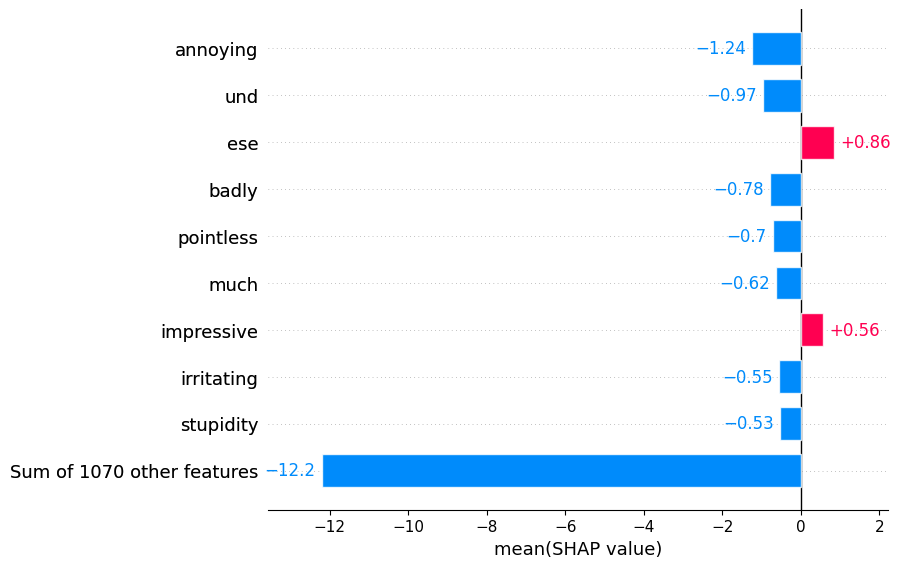

In [11]:
mean_importance_values = shap_values.mean(0)
# TODO: Plot shap values ordered by importance here
shap.plots.bar(mean_importance_values)

You can also aggregate the SHAP values by sum instead of mean. When we do this we get a different picture of the most important features. Please report the third largest summed absolute SHAP value and the feature that corresponds to it.

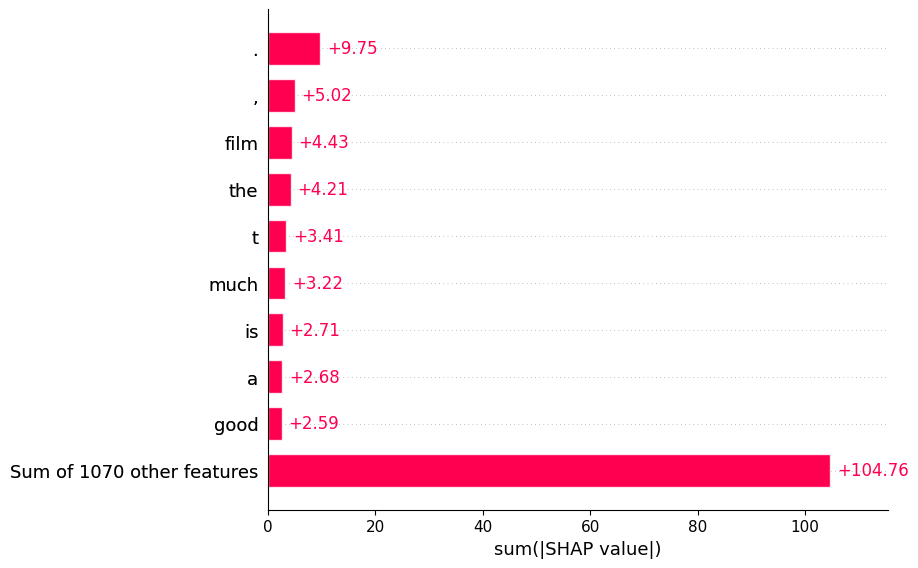

In [12]:
summed_importance_values = shap_values.abs.sum(0)
# TODO: Plot shap values ordered by importance here using the same method as the cell above
shap.plots.bar(summed_importance_values)

Once you obtained the desired results, **head over to Gradescope and submit your solution for this Colab**!